# Environmental Factors Contributing to Changes in Obesity

The obesity epidemic affects over 115 million Americans and costs the US $200 billion a year in healthcare expenditures, but the complex nature of the disease makes it difficult to identify what, if any, policy changes could help reduce obesity. I started to address this question by analyzing data from the USDA Food Environment Atlas. I was specifically interested in whether any of the variables studied were related to the change in childhood obesity from 2008-2011.  I selected variables that included a change in a similar time frame and plotted them against the childhood obesity variable. 

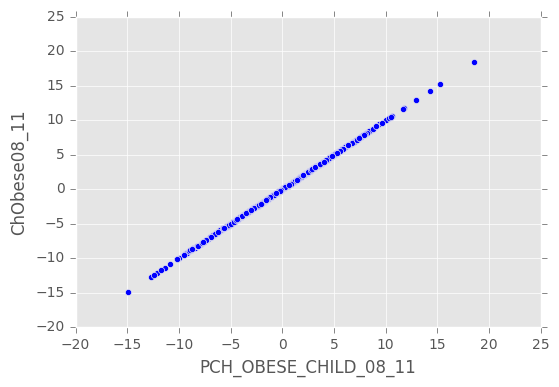

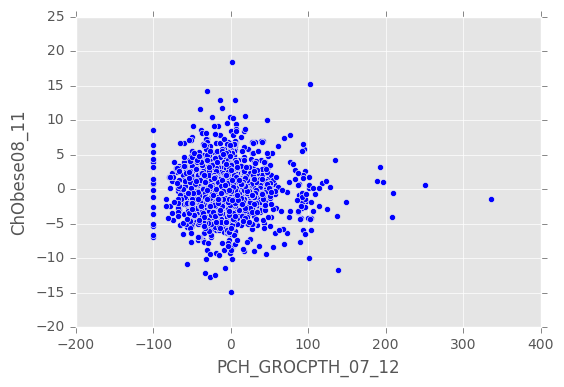

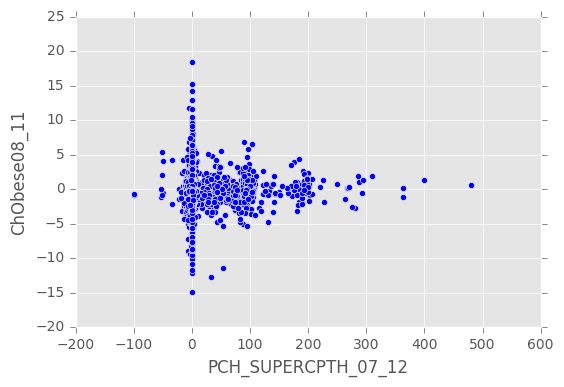

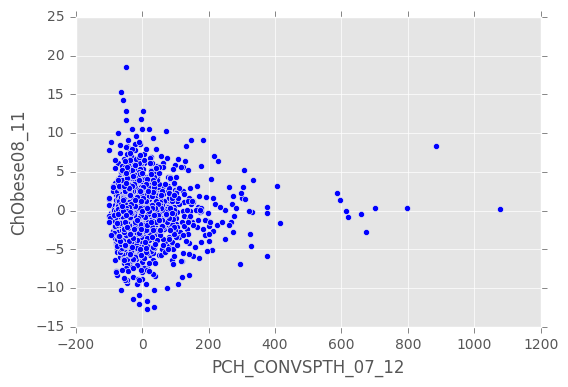

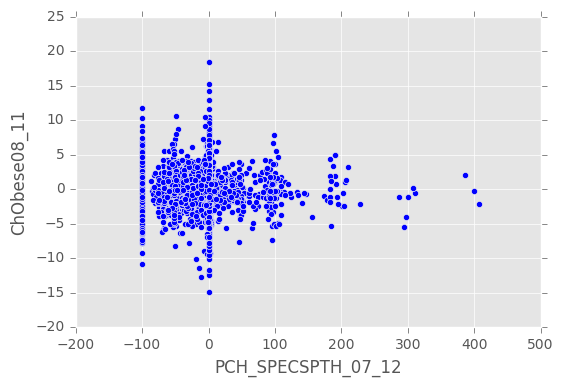

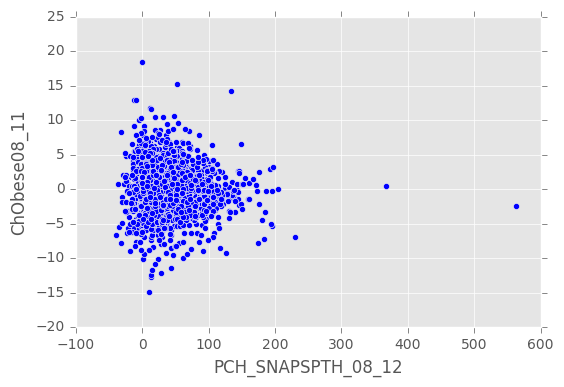

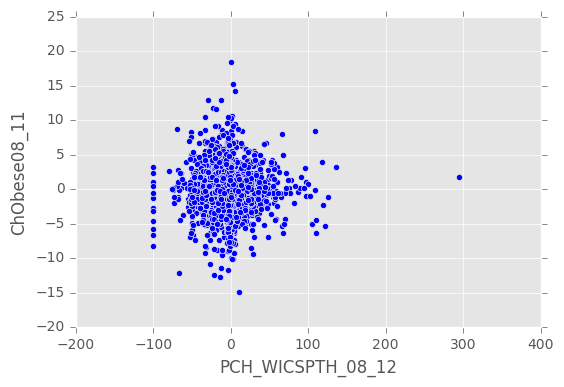

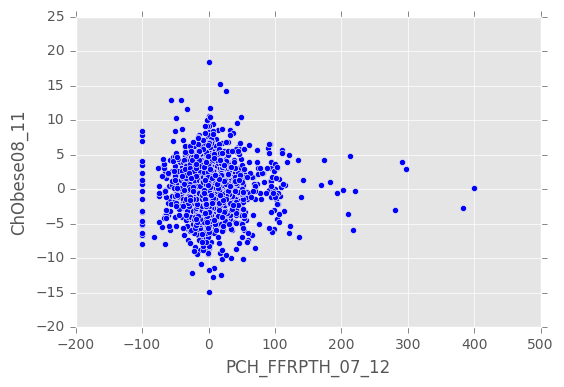

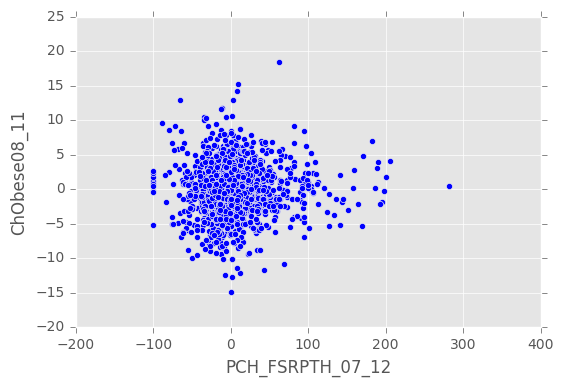

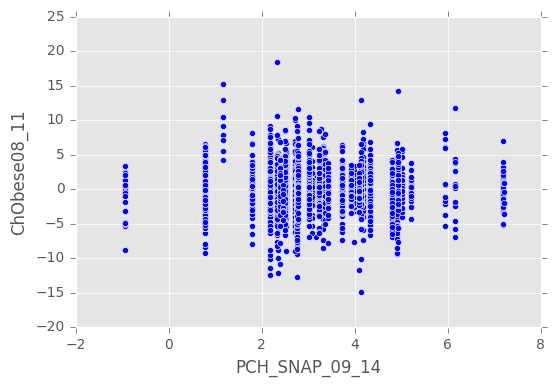

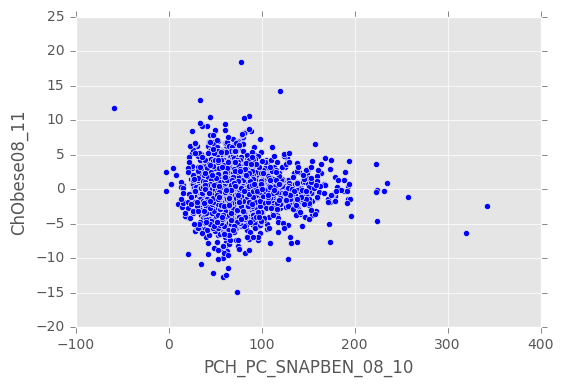

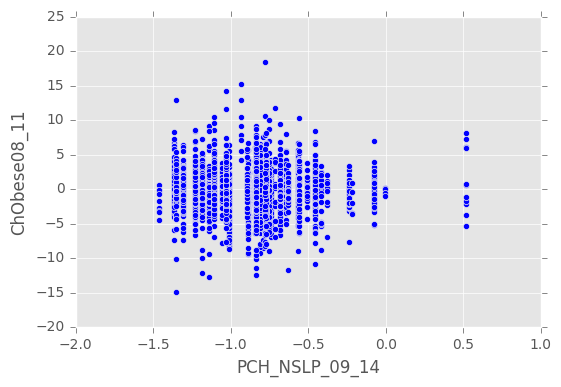

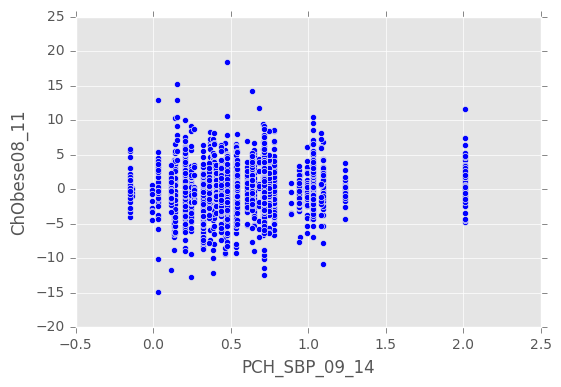

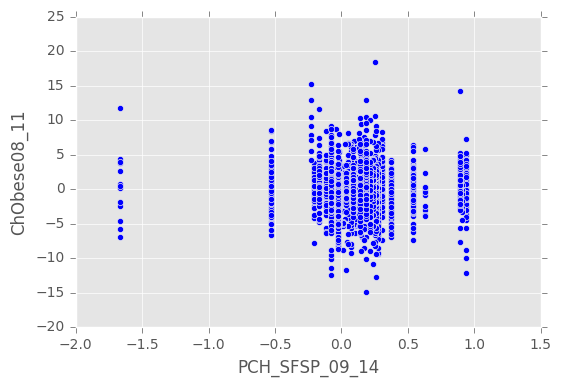

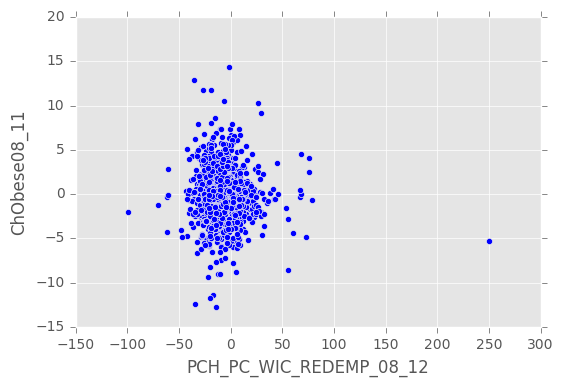

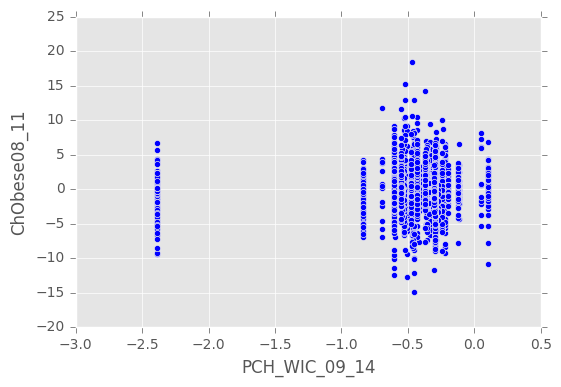

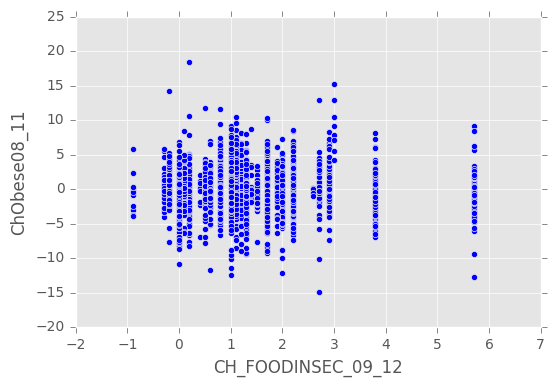

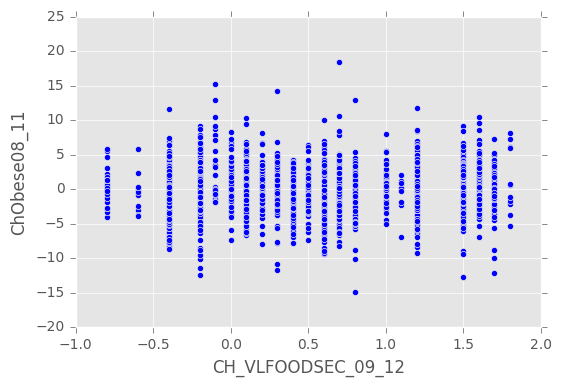

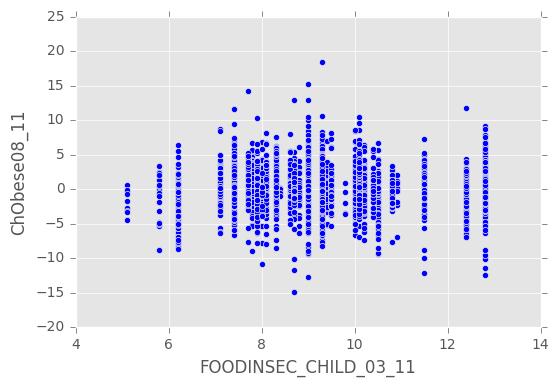

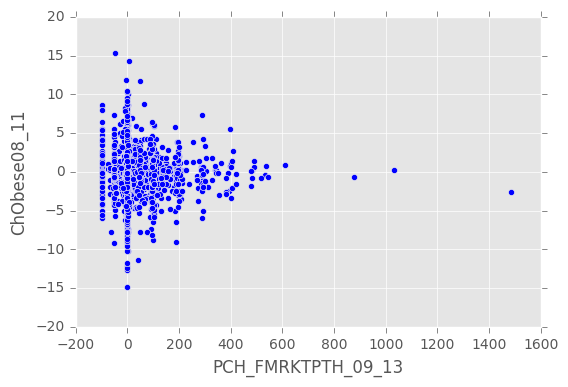

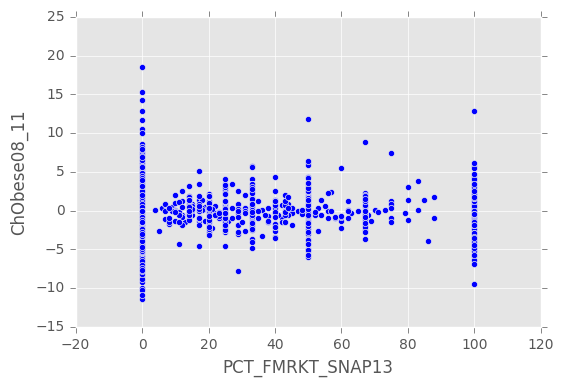

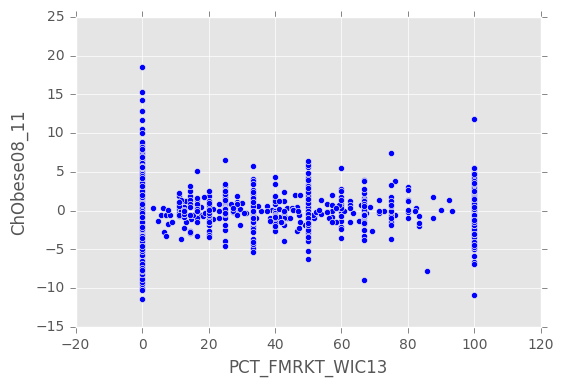

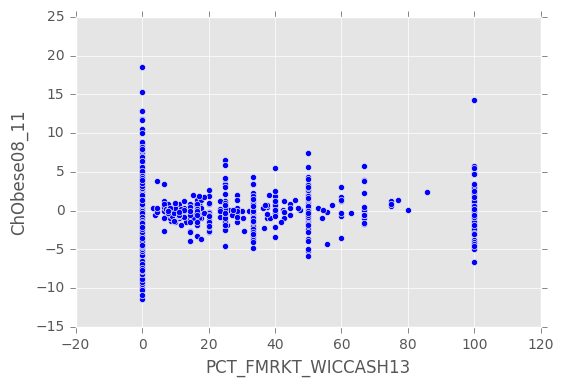

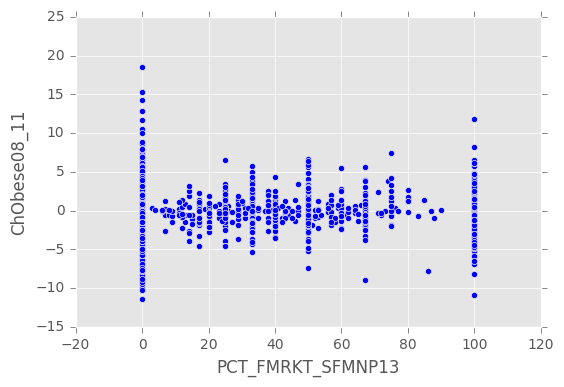

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import sys
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
plt.style.use('ggplot')
FileLocation = "/Users/leblanckh/Documents"
os.chdir(FileLocation)

DF = pd.ExcelFile('USDAFoodEnvironmentAtlas.xls',index_col = 0)
HealthDF = DF.parse('HEALTH')
StoresDF = DF.parse('STORES')
RestDF = DF.parse('RESTAURANTS')
InsecureDF = DF.parse('INSECURITY')
LocalDF = DF.parse('LOCAL')
AssistDF = DF.parse('ASSISTANCE')
SheetList = [RestDF,InsecureDF,LocalDF,AssistDF]

MasterDF = pd.merge(HealthDF,StoresDF,how = 'outer', on = "FIPS")
for dataframe in SheetList:
    MasterDF = pd.merge(MasterDF,dataframe, how = 'outer', on = 'FIPS')


ChObese08_11 = MasterDF.loc[:,'PCH_OBESE_CHILD_08_11']
Gr07_12 = MasterDF.loc[:,'PCH_GROCPTH_07_12']
Super07_12 = MasterDF.loc[:,'PCH_SUPERCPTH_07_12']
Conv07_12 = MasterDF.loc[:,'PCH_CONVSPTH_07_12']
SpFood07_12 = MasterDF.loc[:,'PCH_SPECSPTH_07_12']
SNAPStore08_12 = MasterDF.loc[:,'PCH_SNAPSPTH_08_12']
WICStore08_12 = MasterDF.loc[:,'PCH_WICSPTH_08_12']
FastFood07_12 = MasterDF.loc[:,'PCH_FFRPTH_07_12']
Rest07_12 = MasterDF.loc[:,'PCH_FSRPTH_07_12']
SNAPPart07_12 = MasterDF.loc[:,'PCH_SNAP_09_14']
SNAPBen08_10 = MasterDF.loc[:,'PCH_PC_SNAPBEN_08_10']
SchoolLunch09_14 = MasterDF.loc[:,'PCH_NSLP_09_14']
SchoolBFast09_14 = MasterDF.loc[:,'PCH_SBP_09_14']
SummerFood09_14 = MasterDF.loc[:,'PCH_SFSP_09_14']
WICPerCap08_12 = MasterDF.loc[:,'PCH_PC_WIC_REDEMP_08_12']
WICPart08_12 = MasterDF.loc[:,'PCH_WIC_09_14']
FoodInsec09_12 = MasterDF.loc[:,'CH_FOODINSEC_09_12']
VLowFoodSec09_12 = MasterDF.loc[:,'CH_VLFOODSEC_09_12']
CHFoodInsec03_11 = MasterDF.loc[:,'FOODINSEC_CHILD_03_11']
FarmMkt09_13 = MasterDF.loc[:,'PCH_FMRKTPTH_09_13']
FMktSNAP09_13 = MasterDF.loc[:,'PCT_FMRKT_SNAP13']
FMktWIC09_13 = MasterDF.loc[:,'PCT_FMRKT_WIC13']
FMktWICCash09_13 = MasterDF.loc[:,'PCT_FMRKT_WICCASH13']
FMktSFMNP09_13 = MasterDF.loc[:,'PCT_FMRKT_SFMNP13']

ResultsList = [ChObese08_11,Gr07_12,Super07_12,Conv07_12,SpFood07_12,SNAPStore08_12,WICStore08_12,\
FastFood07_12,Rest07_12,SNAPPart07_12,SNAPBen08_10,SchoolLunch09_14,SchoolBFast09_14,SummerFood09_14,\
WICPerCap08_12,WICPart08_12,FoodInsec09_12,VLowFoodSec09_12,CHFoodInsec03_11,FarmMkt09_13,FMktSNAP09_13,\
FMktWIC09_13,FMktWICCash09_13,FMktSFMNP09_13]

ResultsDF = pd.concat(ResultsList, axis = 1)

for Variable in ResultsList:
    fig,ax = plt.subplots()
    plt.ylabel('ChObese08_11')
    plt.xlabel(Variable.name)
    plt.scatter(Variable,ChObese08_11)
    plt.show()